In [51]:
import numpy as np
import matplotlib.pyplot as plt

**EM Algorithm - Univariate Gaussian**

This example is from the elements of statistics textbook; I wanted to try working on the univariate before applying to our dataset!

Data = [-0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53, 0.06, 0.48, 1.01, 1.68, 1.8, 3.25, 4.12, 4.6, 5.28, 6.22]

Final Params -> u1 = 4.6559128079788685, u2 = 1.0831618077390532, var1 = 0.8187935704379448, var2 = 0.8113706189175437, pi = 0.5545902325255438


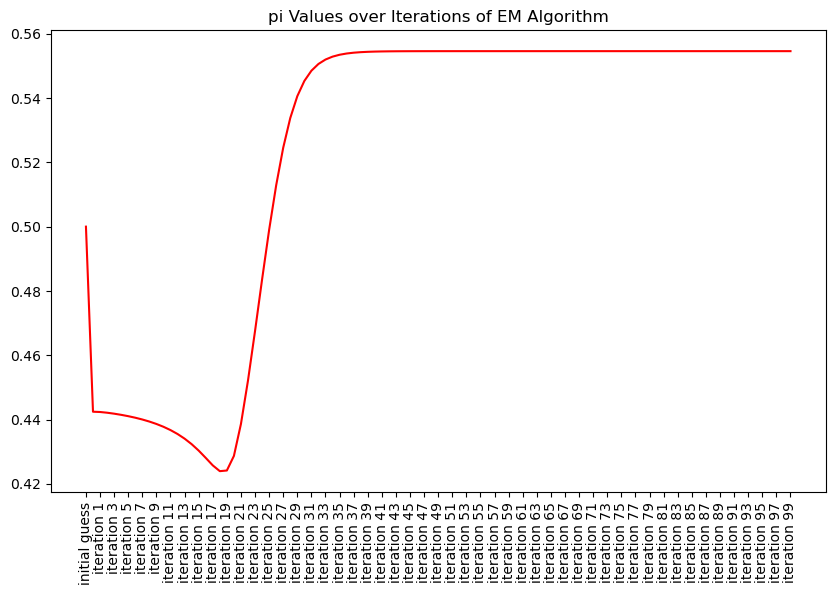

In [57]:
data = "-0.39 0.12 0.94 1.67 1.76 2.44 3.72 4.28 4.92 5.53 0.06 0.48 1.01 1.68 1.80 3.25 4.12 4.60 5.28 6.22"
data = data.split(' ')
data = [float(data[i]) for i in range(len(data))]
print(f'Data = {data}\n')

rand_int = np.random.randint(0,len(data),2)

# Initial Param Guess
u1 = data[rand_int[0]]
u2 = data[rand_int[1]]
var1 = np.var(data, ddof=1)
var2 = np.var(data, ddof=1)
pi = 0.5

n = len(data)
y = data

M_sims = 100
pi_dict = {'initial guess': 0.5}
pi_dict.update({f'iteration {j}': [] for j in range(M_sims)})
gamma_dict = {f'iteration {j}':[] for j in range(M_sims)}
for j in range(M_sims):
    for i in range(len(data)):
        yi = data[i]
        numerator = pi * (1/np.sqrt(2 * np.pi * var2)) * np.exp((-1/(2*var2)) * (yi - u2)**2)
        denominator = (1 - pi) * (1/np.sqrt(2 * np.pi * var1)) * np.exp((-1/(2*var1)) * (yi - u1)**2) + numerator
        gamma_i = numerator/denominator
        gamma_dict[f'iteration {j}'].append(gamma_i)

    gamma = gamma_dict[f'iteration {j}']
    u1 = np.sum([(1 - gamma[i]) * (y[i]) for i in range(n)]) / np.sum([1 - gamma[i] for i in range(n)])
    u2 = np.sum([(gamma[i] * (y[i])) for i in range(n)]) / np.sum([gamma[i] for i in range(n)])
    var1 = np.sum([(1-gamma[i])*(y[i]-u1)**2 for i in range(n)]) / np.sum([1-gamma[i] for i in range(n)])
    var2 = np.sum([(gamma[i])*(y[i]-u2)**2 for i in range(n)]) / np.sum([gamma[i] for i in range(n)])
    pi = np.sum([gamma[i] for i in range(n)]) / n

    pi_dict[f'iteration {j}'].append(pi)

print(f'Final Params -> u1 = {u1}, u2 = {u2}, var1 = {var1}, var2 = {var2}, pi = {list(pi_dict.values())[-1][0]}')

pi_vals = [0.5]+ [list(pi_dict.values())[i][0] for i in range(1,len(list(pi_dict.values())))]
plt.figure(figsize=(10,6))
plt.plot(list(pi_dict.keys()),pi_vals, color = 'red')
plt.title('pi Values over Iterations of EM Algorithm')
xticks = list(pi_dict.keys())[0::2]
plt.xticks(xticks, rotation=90)
plt.show()